In [1]:
#importing eseential liberaries and modules

import pandas as pd
#handls csv files

import numpy as np
#handls every required math

import matplotlib.pyplot as plt
#for better visualization of the data

from sklearn.preprocessing import StandardScaler
#same level normalization(scaling)

from sklearn.model_selection import train_test_split
#spliting the dataset to train and test

from sklearn.impute import SimpleImputer
#handls missing values in dataset

from sklearn.linear_model import LinearRegression 
#ML algorithm which best fits the data linearly

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#evaluate Regression Model

from sklearn.linear_model import LogisticRegression
#ML algorithm which predicts catagories

from sklearn.metrics import accuracy_score 
#calculates the percentage of correct predictions for logisticRegression

from sklearn.metrics import classification_report
#Shows precision, recall, F1-score, and support for each class.

from sklearn.metrics import ConfusionMatrixDisplay
#visualizes classification results

In [2]:
#loading the dataset

df = pd.read_csv(r"C:\Users\worku\OneDrive\Desktop\Ride_Price1.csv",na_values=["", " ", "  ", "NA", "N/A", "null", "-"])
print(df.head())

   trip_id         city  distance_km  trip_duration_min time_of_day  \
0        1  Addis Ababa         8.63               18.5     morning   
1        2  Addis Ababa        14.55               41.6   afternoon   
2        3  Addis Ababa         0.50                5.0     morning   
3        4  Addis Ababa         6.40               23.9     morning   
4        5  Addis Ababa         3.36               11.1     evening   

  traffic_level weather_condition demand_level  ride_price  
0        medium            cloudy         peak      308.60  
1           low             clear         peak      464.58  
2        medium             clear         peak       40.00  
3           low             clear         peak      220.12  
4        medium             rainy          low       93.40  


Ride price usually increases with distance.Longer trips → more fuel → more cost.
Time spent affects driver effort and cost.Even if distance is same, traffic can increase duration.
Many ride systems charge based on time + distance.
Prices differ between cities.Fuel cost, demand, traffic patterns differ.Economic differences affect base fare.
Weather affects both demand and duration.
High traffic → longer trip time.Longer time → higher price.
Rush hour = higher demand.

In [3]:
#checks missing values

df.isnull()

,trip_id,city,distance_km,trip_duration_min,time_of_day,traffic_level,weather_condition,demand_level,ride_price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,True,False,False


In [4]:
#checks the amount of missing values

df.isnull().sum()

trip_id              0
city                 0
distance_km          0
trip_duration_min    1
time_of_day          1
traffic_level        0
weather_condition    1
demand_level         0
ride_price           0
dtype: int64

In [5]:
#display the missing value rows
df[df.isnull().any(axis=1)]

,trip_id,city,distance_km,trip_duration_min,time_of_day,traffic_level,weather_condition,demand_level,ride_price
172,173,Addis Ababa,8.98,NaN,evening,medium,clear,normal,248.06
173,174,Addis Ababa,11.66,25.1,NaN,medium,rainy,normal,345.89
178,179,Addis Ababa,12.91,27.4,evening,medium,NaN,peak,504.72


In [6]:
#identifying catagorical values
cat_cols = df.select_dtypes(include='object').columns
for cols in cat_cols:
    print(f"\ncolumn: {cols}")
    print(df[cols].unique())
    


column: city
['Addis Ababa' 'ADDIS ABABA']

column: time_of_day
['morning' 'afternoon' 'evening' 'night' nan]

column: traffic_level
['medium' 'low' 'high' 'MEDIUM']

column: weather_condition
['cloudy' 'clear' 'rainy' nan]

column: demand_level
['peak' 'low' 'normal']


In [7]:
#identifying inconsistent values
for cols in cat_cols:
    print(df[cols].value_counts())

city
Addis Ababa    179
ADDIS ABABA      1
Name: count, dtype: int64
time_of_day
afternoon    58
evening      58
morning      42
night        21
Name: count, dtype: int64
traffic_level
medium    118
high       33
low        27
MEDIUM      2
Name: count, dtype: int64
weather_condition
clear     140
cloudy     27
rainy      12
Name: count, dtype: int64
demand_level
normal    74
peak      56
low       50
Name: count, dtype: int64


In [8]:
num_cols = df.select_dtypes(include='number').columns #identifying numerical values
num_cols = num_cols.drop('trip_id')
df[num_cols].describe()

,distance_km,trip_duration_min,ride_price
count,180.000000,179.000000,180.000000
mean,9.863556,22.036313,342.596500
std,4.879310,10.660790,281.346033
min,0.500000,5.000000,40.000000
25%,6.112500,13.500000,157.287500
50%,9.405000,20.600000,269.945000
75%,13.775000,28.100000,505.920000
max,19.380000,59.700000,3000.000000


In [9]:
Q1 = df[num_cols].quantile(0.25)
print(Q1)

distance_km            6.1125
trip_duration_min     13.5000
ride_price           157.2875
Name: 0.25, dtype: float64


In [10]:
Q3 = df[num_cols].quantile(0.75)
print(Q3)
IQR = Q3 - Q1

distance_km           13.775
trip_duration_min     28.100
ride_price           505.920
Name: 0.75, dtype: float64


In [11]:
outliners = df[
    (df[num_cols] < (Q1-1.5*IQR))|
    (df[num_cols] > (Q3+1.5*IQR))
].any(axis=1)

In [12]:
#identifying outliners
df[outliners]

,trip_id,city,distance_km,trip_duration_min,time_of_day,traffic_level,weather_condition,demand_level,ride_price
32,33,Addis Ababa,19.18,59.7,evening,medium,rainy,normal,529.90
34,35,Addis Ababa,18.51,54.9,evening,medium,cloudy,peak,744.88
179,180,Addis Ababa,6.58,14.3,evening,MEDIUM,clear,low,3000.00


<Axes: >

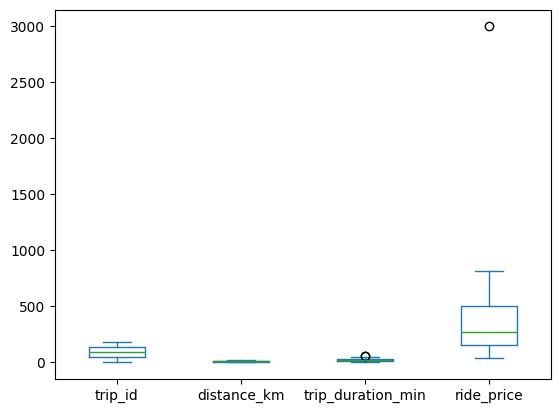

In [13]:
df.plot.box() #visualizing the dataset

Poor data quality negatively affects model performance by introducing noise, bias, and incorrect patterns into the learning process. Since machine learning models rely entirely on data to identify relationships, inaccurate, missing, or inconsistent data leads to unreliable predictions and reduced model accuracy.So I am going to handle them.

In [14]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
#handling missing values of numerical features

df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
#handling missing values of catagorical features 

In [15]:
df.isnull().sum()

trip_id              0
city                 0
distance_km          0
trip_duration_min    0
time_of_day          0
traffic_level        0
weather_condition    0
demand_level         0
ride_price           0
dtype: int64

In [16]:
#encoding the data from cagorical to numerical(1,0)
df_encoded = pd.get_dummies(df,drop_first = True)

In [17]:
print(df_encoded.head())

   trip_id  distance_km  trip_duration_min  ride_price  city_Addis Ababa  \
0        1         8.63               18.5      308.60              True   
1        2        14.55               41.6      464.58              True   
2        3         0.50                5.0       40.00              True   
3        4         6.40               23.9      220.12              True   
4        5         3.36               11.1       93.40              True   

   time_of_day_evening  time_of_day_morning  time_of_day_night  \
0                False                 True              False   
1                False                False              False   
2                False                 True              False   
3                False                 True              False   
4                 True                False              False   

   traffic_level_high  traffic_level_low  traffic_level_medium  \
0               False              False                  True   
1             

In [18]:
#scaling the numerical values with the same level
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].describe()

,distance_km,trip_duration_min,ride_price
count,1.800000e+02,1.800000e+02,1.800000e+02
mean,4.934325e-17,8.881784e-17,-1.381611e-16
std,1.002789e+00,1.002789e+00,1.002789e+00
min,-1.924386e+00,-1.606153e+00,-1.078532e+00
25%,-7.709120e-01,-8.044129e-01,-6.604888e-01
50%,-9.424174e-02,-1.347238e-01,-2.589486e-01
75%,8.038750e-01,5.726942e-01,5.821268e-01
max,1.955807e+00,3.553282e+00,9.471667e+00


In [19]:
#handling the outliners
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)


In [20]:

df[num_cols].describe()

,distance_km,trip_duration_min,ride_price
count,1.800000e+02,180.000000,180.000000
mean,4.934325e-17,-0.007651,-0.039031
std,1.002789e+00,0.979317,0.732320
min,-1.924386e+00,-1.606153,-1.078532
25%,-7.709120e-01,-0.804413,-0.660489
50%,-9.424174e-02,-0.134724,-0.258949
75%,8.038750e-01,0.572694,0.582127
max,1.955807e+00,2.638355,2.446050


In [21]:
df[outliners]

,trip_id,city,distance_km,trip_duration_min,time_of_day,traffic_level,weather_condition,demand_level,ride_price
32,33,Addis Ababa,1.914703,2.638355,evening,medium,rainy,normal,0.667598
34,35,Addis Ababa,1.777006,2.638355,evening,medium,cloudy,peak,1.433842
179,180,Addis Ababa,-0.674832,-0.728955,evening,MEDIUM,clear,low,2.446050


In [22]:
#Developing models

x = df_encoded.drop(columns = ['ride_price'])
y = df_encoded['ride_price']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (144, 14)
x_test shape: (36, 14)
y_train shape: (144,)
y_test shape: (36,)


In [25]:
x_train.isnull().sum()

trip_id                     0
distance_km                 0
trip_duration_min           0
city_Addis Ababa            0
time_of_day_evening         0
time_of_day_morning         0
time_of_day_night           0
traffic_level_high          0
traffic_level_low           0
traffic_level_medium        0
weather_condition_cloudy    0
weather_condition_rainy     0
demand_level_normal         0
demand_level_peak           0
dtype: int64

In [26]:
x_test.isnull().sum()

trip_id                     0
distance_km                 0
trip_duration_min           0
city_Addis Ababa            0
time_of_day_evening         0
time_of_day_morning         0
time_of_day_night           0
traffic_level_high          0
traffic_level_low           0
traffic_level_medium        0
weather_condition_cloudy    0
weather_condition_rainy     0
demand_level_normal         0
demand_level_peak           0
dtype: int64

In [27]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [28]:
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [29]:
print('mean absolute error:',mae)
print('root mean squared error:',rmse)
print('R2:',r2)

mean absolute error: 27.316807605672807
root mean squared error: 34.69558106366549
R2: 0.9647432733961745


In [30]:
train_pred = model.predict(x_train)

print("Train R2:", r2_score(y_train, train_pred))
print("Test R2:", r2)


Train R2: 0.6908802112818566
Test R2: 0.9647432733961745


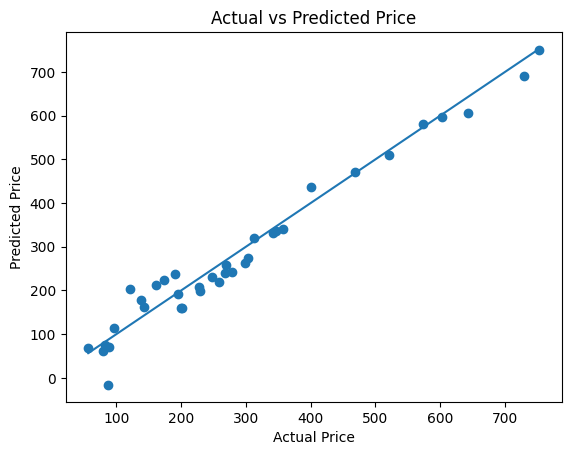

In [31]:
plt.figure()
plt.scatter(y_test,y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()])
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()



In [32]:
#logistics Regression

threshold = df['ride_price'].median()

In [33]:
df['cost_class'] = np.where(df['ride_price']>= threshold, 1,0)
df.columns

Index(['trip_id', 'city', 'distance_km', 'trip_duration_min', 'time_of_day',
       'traffic_level', 'weather_condition', 'demand_level', 'ride_price',
       'cost_class'],
      dtype='object')

In [34]:
X = df.drop(columns=['ride_price','cost_class'])
Y = df['cost_class']

In [35]:
X = pd.get_dummies(X,drop_first = True)
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42
)


In [36]:
model = LogisticRegression(max_iter = 1000)

In [37]:
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [38]:
accuracy = accuracy_score(Y_test,Y_pred)
print('accuracy:',accuracy)

accuracy: 0.9444444444444444


In [39]:
print(classification_report(
    Y_test,
    Y_pred,
    target_names=["Low-Cost", "High-Cost"]
))


              precision    recall  f1-score   support

    Low-Cost       1.00      0.90      0.95        21
   High-Cost       0.88      1.00      0.94        15

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



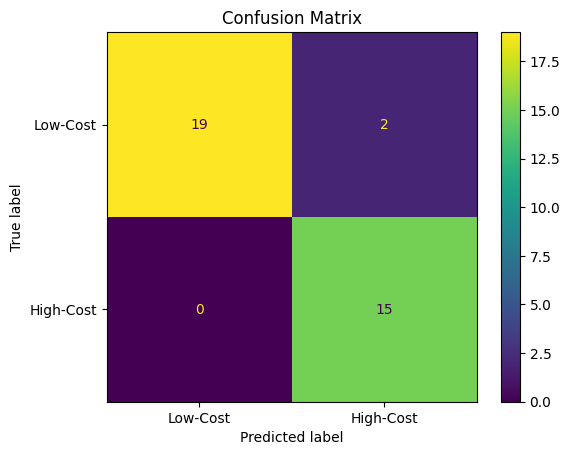

In [40]:
ConfusionMatrixDisplay.from_predictions(
    Y_test,
    Y_pred,
    display_labels=["Low-Cost", "High-Cost"]
)

plt.title("Confusion Matrix")
plt.show()


probabilities in classification first calculated using logisticregression model and then the model uses the sigmoid function to squeez the output between 0 and 1 and then the model uses the threshold value of 0.5  then the model predicts the result by comparing the output to this value.When an output greater than 0.5 will be  high price and below 0.5 will be low price.

Model Evaluation & Comparison|
Regression vs Classification

Regression predicts exact ride price (continuous value).Classification predicts price category (e.g., low / medium / high).Regression gives more precise outputs; classification is easier to interpret.

Impact of Data Quality

Missing or noisy data reduced accuracy in both models.Outliers affecte regression more than classification.Limited feature diversity constrained model learning.

Most Influential Feature

Distance of the ride had the strongest impact on price prediction.


Real-World Deployment Risk

Inaccurate predictions during unusual conditions (traffic, events).Dataset Limitation.Dataset lacks real-time and contextual features (weather, demand).